In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
from scipy import interpolate
import tqdm
import os
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

sys.path.append('../my_funcs/')
from pipeline_main import pipeline
from pipeline_2D import to_osyris_ivs
from my_amr2raw import amr2raw
from plot_funcs import plot_density

top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')
sys.path.insert(0,top+'utilities/python')
import dispatch as dis
import dispatch.select as dse
import dispatch as dis
import dispatch.select as dse

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

In [12]:
# Create directory containing the snapshots
snaps = {}
i_snap = 357; f_snap = 357 + 1
for io in range(i_snap, f_snap):
    sn = dis.snapshot(io,'my_core_13lacc')
    snaps[io] = sn
    print(io, sn.time)

357 0.0008100000000000015


In [5]:
data = pipeline(snap = 357, run = 'my_core_13lacc', sink_id=13)
data.recalc_L(verbose = 1); 
data.calc_trans_xyz()

Initialising patch data


100%|██████████| 4165/4165 [00:03<00:00, 1232.01it/s]


Converged mean angular momentum vector after 0 iteration(s)
Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:00<00:00, 5079.65it/s]


In [13]:
ds = 0.5**20
w = 200
size = w * ds
extent = size * sn.scaling.l / sn.cgs.au; print(extent,'AU')
ρ = dse.amr2raw(sn, center = data.star_pos, width = w, verbose = 1, lmax = 20, lmin = 15, ivs = 'd')

157.38176152030414 AU
variable list: ['d']
  8.6s for 1773 patches
writing raw file paraview200.raw


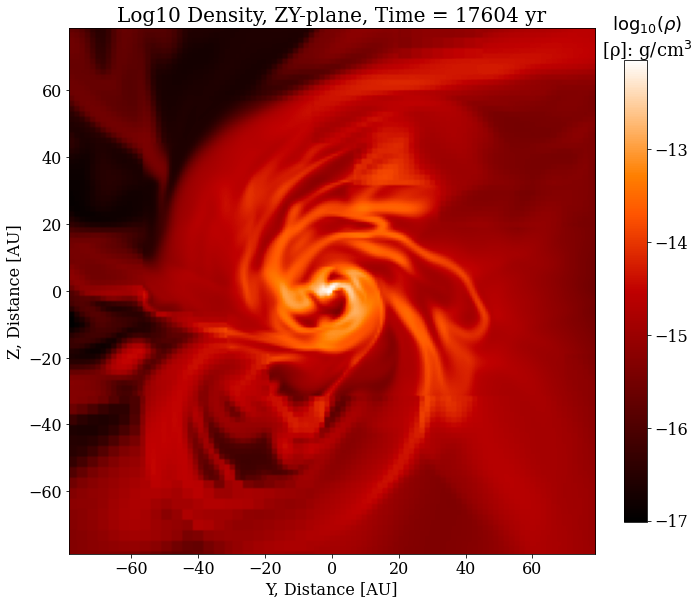

In [14]:
plot_density(ρ, w, sn, hide_ticks = False)

In [21]:
variable = ['d']
data.to_osyris_ivs(variables=variable, view = 157, dz = 157)

Looping over DISPATCH data to extract data at highest level


100%|██████████| 1188/1188 [00:04<00:00, 248.26it/s]


Setting up Osyris data structure


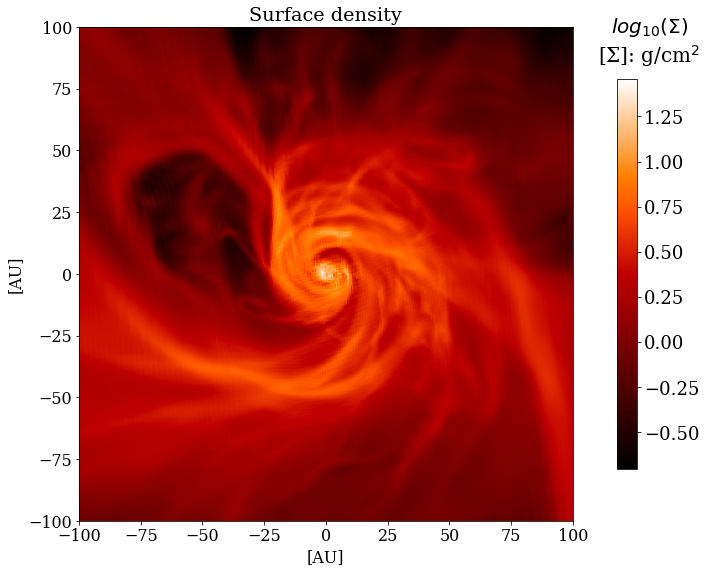

In [26]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data.osyris_ivs[0] * data.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

In [12]:
def plot_density(dens_data, width, snapshot, lmax = 20,  axis = 0, hide_ticks = True):

    ds = 0.5**lmax
    size = width * ds
    extent = size * snapshot.scaling.l / snapshot.cgs.au
    cgs_density = snapshot.scaling.d
    cgs_to_yr = snapshot.scaling.t / snapshot.cgs.yr
    

    fig, axs = plt.subplots(figsize = (10, 10))
    plot_data_d = np.log10(np.take(dens_data * cgs_density, np.shape(dens_data)[axis] // 2, axis=axis)).transpose()

    cs = axs.imshow(plot_data_d, cmap = 'YlOrBr', extent = (-extent/2, extent/2, -extent/2, extent/2), origin = 'lower')
    cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.06);
    cbar.set_label('$\log_{10}(ρ)$\n[ρ]: g/cm$^3$', labelpad = -40, y = 1.16, rotation = 0, fontsize = 20*1.2)

    #axs.set_title(f'Log10 Density, {planes[axis]}-plane, Time = {snapshot.time * cgs_to_yr:4.0f} yr', fontsize = 20)
    if hide_ticks:
        axs.set_xticks([]); axs.set_yticks([])
        scalebar = AnchoredSizeBar(axs.transData, 20, '20 AU', 'lower center', 
                           pad=0.5,
                           color='white',
                           
                           frameon=False,
                           fontproperties = fm.FontProperties(size=28*1.2),
                           size_vertical=1,
                           label_top=True)

        axs.add_artist(scalebar)
    else:
        axs.set_xlabel(f'{planes[axis][-1]}, Distance [AU]', fontsize = 16); axs.set_ylabel(f'{planes[axis][0]}, Distance [AU]', fontsize = 16)

    plt.tight_layout()

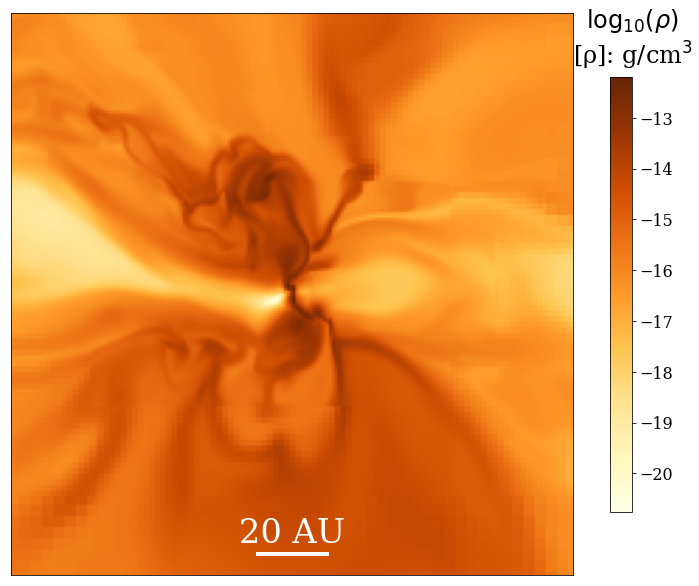

In [13]:
plot_density(ρ, w, sn, hide_ticks = True, axis=1)

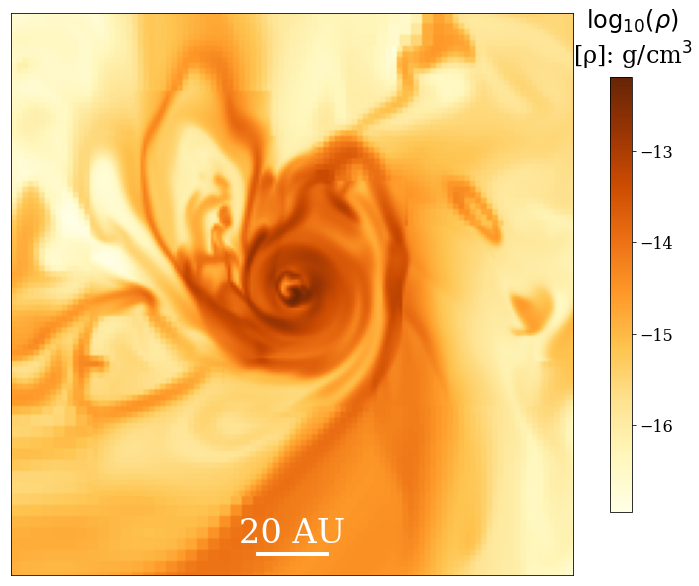

In [14]:
plot_density(ρ, w, sn, hide_ticks = True, axis=0)

In [15]:
ds*data.sn.scaling.l 

11772155761718.75

In [15]:
Σ_1 = np.sum(ρ * data.cgs_density * (ds*data.sn.scaling.l)**3, axis = 0) / (ds*data.sn.scaling.l)**2


Text(0, 0.5, ' Distance [AU]')

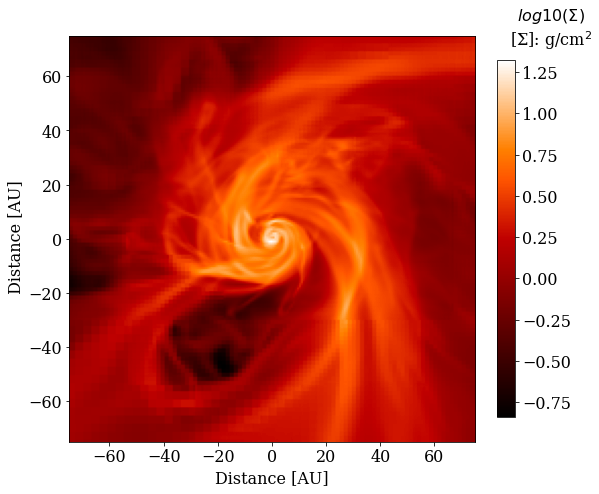

In [20]:
fig, axs = plt.subplots(figsize = (8,8))
cs = plt.imshow(np.log10(Σ_1).T, extent = (-75, 75, -75, 75), cmap = 'gist_heat', origin='lower')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.04);
cbar.set_label('$log10(Σ)$\n[Σ]: g/cm$^2$', labelpad = -20, y = 1.15, rotation = 0, fontsize = 16)
axs.set_xlabel(f'Distance [AU]', fontsize = 16); axs.set_ylabel(' Distance [AU]', fontsize = 16)

In [23]:
Σ_1 = np.sum(ρ * data.cgs_density * (ds*data.sn.scaling.l)**3, axis = 0) #/ (ds*data.sn.scaling.l)**2
Σ_2 = np.sum(ρ * data.cgs_density * (ds*data.sn.scaling.l)**3, axis = 1) / (ds*data.sn.scaling.l)**2

In [24]:
Σ_1

array([[2.67872236e+26, 2.23395530e+26, 2.23395530e+26, ...,
        7.49579745e+25, 7.53313043e+25, 7.53313043e+25],
       [2.67872236e+26, 2.23395530e+26, 2.23395530e+26, ...,
        7.49579745e+25, 7.53313043e+25, 7.53313043e+25],
       [2.67872236e+26, 2.23395530e+26, 2.23395530e+26, ...,
        7.65302141e+25, 7.59021457e+25, 7.59021457e+25],
       ...,
       [7.21814821e+25, 8.11272076e+25, 8.11272076e+25, ...,
        1.28747126e+26, 1.26570511e+26, 1.26570511e+26],
       [7.21485364e+25, 8.11050999e+25, 8.11050999e+25, ...,
        1.25531558e+26, 1.23354943e+26, 1.23354943e+26],
       [7.19447279e+25, 8.07498942e+25, 8.07498942e+25, ...,
        1.23608800e+26, 1.20549946e+26, 1.20549946e+26]])

YlOrBr

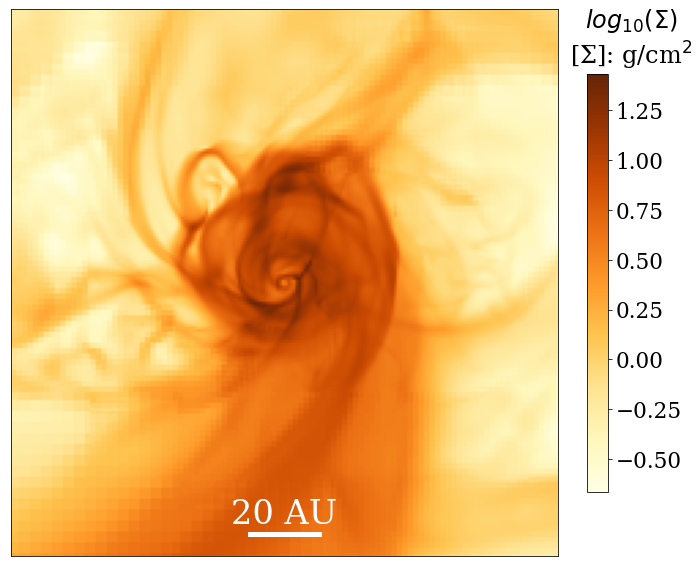

In [21]:

fig, axs = plt.subplots(figsize = (10,10))
cs = plt.imshow(np.log10(Σ_1).T, extent = (-75, 75, -75, 75), cmap = 'YlOrBr', origin='lower')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.05);
cbar.ax.xaxis.set_label_coords(-10, -10)
axs.set_xticks([]); axs.set_yticks([])
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20*1.2)
cbar.ax.tick_params(labelsize=18*1.20)
scalebar = AnchoredSizeBar(axs.transData, 20, '20 AU', 'lower center', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           fontproperties = fm.FontProperties(size=28*1.2),
                           size_vertical=1,
                           label_top=True)

axs.add_artist(scalebar)
#axs.set_title(f'Log10 Surface density, ZY-plane, Time = {data.time:4.0f} yr', fontsize = 20)
plt.tight_layout()

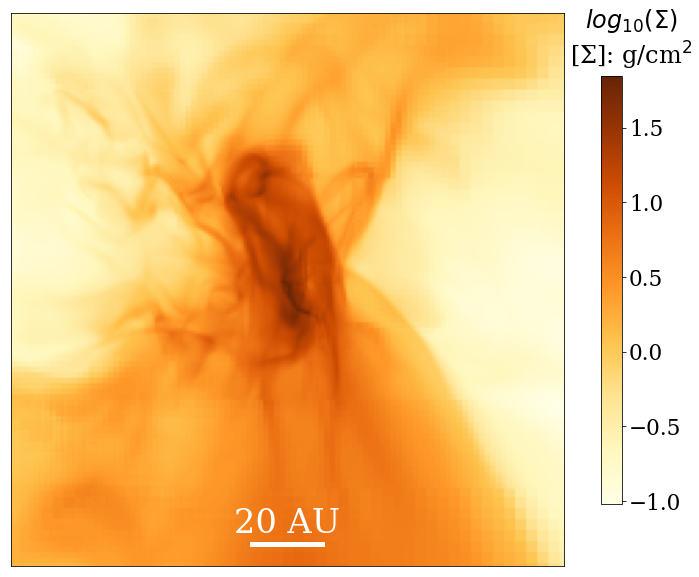

In [22]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fig, axs = plt.subplots(figsize = (10,10))
cs = plt.imshow(np.log10(Σ_2).T, extent = (-75, 75, -75, 75), cmap = 'YlOrBr', origin='lower')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.06);
cbar.ax.xaxis.set_label_coords(-10, -10)
axs.set_xticks([]); axs.set_yticks([])
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20*1.2)
cbar.ax.tick_params(labelsize=18*1.2)
scalebar = AnchoredSizeBar(axs.transData, 20, '20 AU', 'lower center', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           fontproperties = fm.FontProperties(size=28*1.2),
                           size_vertical=1,
                           label_top=True)

axs.add_artist(scalebar)
#axs.set_title(f'Log10 Surface density, ZY-plane, Time = {data.time:4.0f} yr', fontsize = 20)
plt.tight_layout()

### Interpolate when looping over patches gradually filling out the global defined coordinate system

In [ ]:
box_length = 40 # [au]
box_height = 10
Nr = 100
Nh = 40
bins = np.linspace(-box_length//2, box_length//2, Nr) 
h_bins = np.linspace(-box_height//2, box_height//2, Nh) 
cell_area = np.diff(bins)[0]**2 
cell_vol = cell_area * np.diff(h_bins)[0]
xx, yy, zz = np.meshgrid(bins, bins, h_bins, indexing = 'ij')
global_carcoor = np.stack((xx, yy, zz), axis=0)

In [ ]:
np.min(np.diff(bins)**2), np.min(np.diff(bins)**2)

0.16324864809713074

In [ ]:
for p in tqdm.tqdm(data.sn.patches):
    if p.id == 1853: break

 44%|████▍     | 1852/4165 [00:00<00:00, 1082174.84it/s]


In [ ]:
proj_data = interpolate.griddata(p.trans_xyz.transpose(1,2,3,0).reshape(-1, 3) * data.au_length, p.var('d').reshape(-1), xi = (xx, yy, zz), method='linear', fill_value=0)

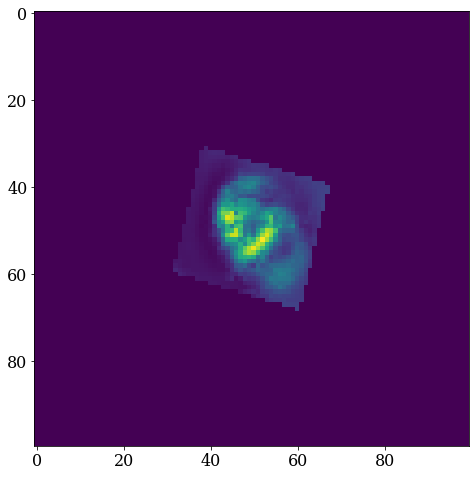

In [ ]:
fig, axs = plt.subplots(figsize = (8,8))
plt.imshow(proj_data[...,19])

In [ ]:
height = 10; radius = 55
height /= data.au_length; radius /= data.au_length
pp = [p for p in data.sn.patches if (p.cyl_R < radius).any() and ((abs(p.cyl_z) < height).any() or (abs(p.cyl_z / p.cyl_R) < 0.3).any())]

# The cell below takes ~1.5min to run

In [ ]:

# VERY IMPORTANT NOTE: After the transformation the first axis is the height
patch_cartcoor = []
patch_values = []
for p in tqdm.tqdm(pp):       
    nbors = [data.sn.patchid[i] for i in p.nbor_ids if i in data.sn.patchid]
    children = [ n for n in nbors if n.level == p.level + 1]
    leafs = [n for n in children if ((n.position - p.position)**2).sum() < ((p.size)**2).sum()/12]   
    if len(leafs) == 8: continue
    idx = np.asarray(np.nonzero((p.cyl_R < radius) & ((abs(p.cyl_z) < height) | (abs(p.cyl_z / p.cyl_R) < 0.3))))
    for lp in leafs: 

        extent = np.vstack((lp.position - 0.5 * lp.size, lp.position + 0.5 * lp.size)).T
        covered_idx = np.asarray(np.nonzero((p.xyz[0] > extent[0,0]) & (p.xyz[0] < extent[0,1])
                                 & (p.xyz[1] > extent[1,0]) & (p.xyz[1] < extent[1,1])
                                 & (p.xyz[2] > extent[2,0]) & (p.xyz[2] < extent[2,1])))
        to_remove_from_idx = np.all(idx.T[:, None, :] == covered_idx.T, axis = -1).any(axis = 1)
        idx = np.copy(idx.T[~to_remove_from_idx].T)
        if np.sum(idx) == 0:
            continue
    if np.sum(idx) == 0:
            continue    


    new_coor = p.trans_xyz[:, idx[0], idx[1], idx[2]].T # This bug was here - I used p.cyl_r
    new_value = p.var('d')[idx[0], idx[1], idx[2]].T
    if len(new_value) < 5: continue # 5 Values are needed for the interpolation
    global_values += interpolate.griddata(new_coor * data.au_length, new_value, xi = (xx, yy, zz), method='nearest', fill_value=0)


  0%|          | 0/283 [00:00<?, ?it/s]

100%|██████████| 283/283 [01:32<00:00,  3.07it/s]


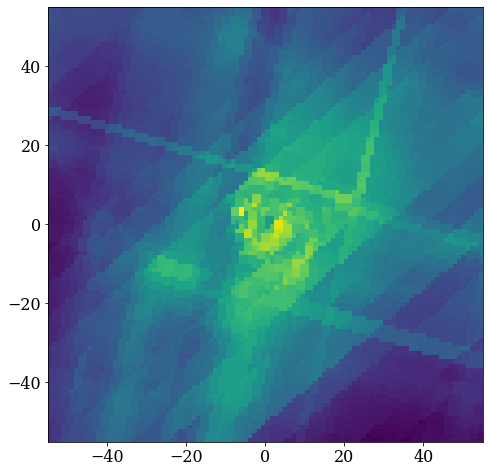

In [ ]:
fig, axs = plt.subplots(figsize = (8,8))
plt.imshow(global_values[...,19], extent = (-55, 55, -55, 55))

# The cell below takes ~4.5min to run

In [ ]:
global_values = np.zeros((Nr, Nr, Nh))
height = 10; radius = 55
height /= data.au_length; radius /= data.au_length
# VERY IMPORTANT NOTE: After the transformation the first axis is the height
patch_cartcoor = []
patch_values = []
for p in tqdm.tqdm(pp):       
    nbors = [data.sn.patchid[i] for i in p.nbor_ids if i in data.sn.patchid]
    children = [ n for n in nbors if n.level == p.level + 1]
    leafs = [n for n in children if ((n.position - p.position)**2).sum() < ((p.size)**2).sum()/12]   
    if len(leafs) == 8: continue
    idx = np.asarray(np.nonzero((p.cyl_R < radius) & ((abs(p.cyl_z) < height) | (abs(p.cyl_z / p.cyl_R) < 0.3))))
    for lp in leafs: 

        extent = np.vstack((lp.position - 0.5 * lp.size, lp.position + 0.5 * lp.size)).T
        covered_idx = np.asarray(np.nonzero((p.xyz[0] > extent[0,0]) & (p.xyz[0] < extent[0,1])
                                 & (p.xyz[1] > extent[1,0]) & (p.xyz[1] < extent[1,1])
                                 & (p.xyz[2] > extent[2,0]) & (p.xyz[2] < extent[2,1])))
        to_remove_from_idx = np.all(idx.T[:, None, :] == covered_idx.T, axis = -1).any(axis = 1)
        idx = np.copy(idx.T[~to_remove_from_idx].T)
        if np.sum(idx) == 0:
            continue
    if np.sum(idx) == 0:
            continue    


    new_coor = p.trans_xyz[:, idx[0], idx[1], idx[2]].T # This bug was here - I used p.cyl_r
    new_value = p.var('d')[idx[0], idx[1], idx[2]].T * data.cgs_density
    if len(new_value) < 5: continue # 5 Values are needed for the interpolation
    try:
        global_values += interpolate.griddata(new_coor * data.au_length, new_value, xi = (xx, yy, zz), method='linear', fill_value=0)
    except:
        global_values += interpolate.griddata(new_coor * data.au_length, new_value, xi = (xx, yy, zz), method='nearest', fill_value=0)
    


100%|██████████| 283/283 [04:27<00:00,  1.06it/s]


In [ ]:
#np.save('to_2D/interpolation', global_values)
values_load = np.load('to_2D/interpolation.npy')

In [ ]:
Σ = np.sum(values_load * cell_vol, axis = -1) / cell_area

Text(0, 0.5, ' Distance [AU]')

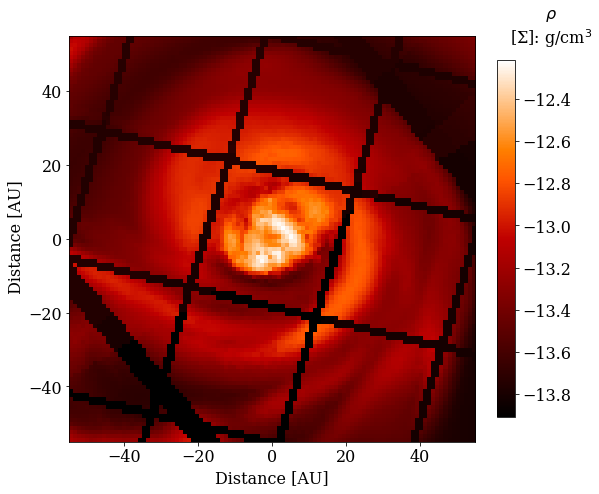

In [ ]:
fig, axs = plt.subplots(figsize = (8,8))
cs = plt.imshow(np.log10(values_load[...,19]).T, extent = (-55, 55, -55, 55), cmap = 'gist_heat', origin='lower')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.04);
cbar.set_label('$ρ$\n[Σ]: g/cm$^3$', labelpad = -20, y = 1.15, rotation = 0, fontsize = 16)
axs.set_xlabel(f'Distance [AU]', fontsize = 16); axs.set_ylabel(' Distance [AU]', fontsize = 16)

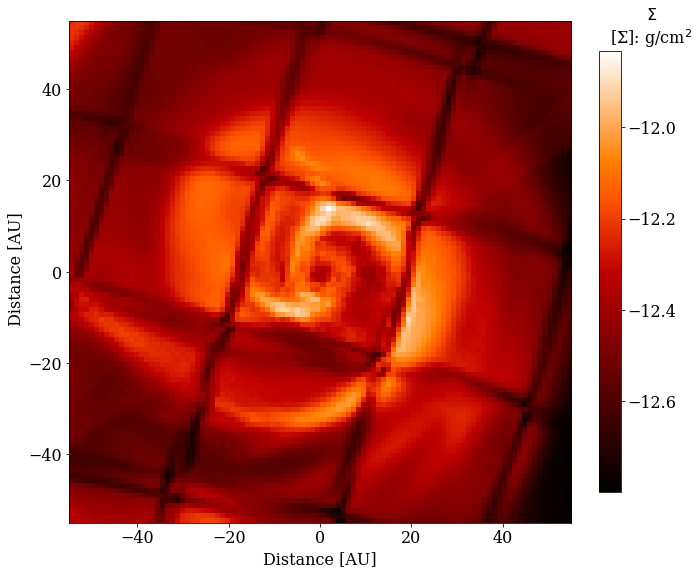

In [ ]:
fig, axs = plt.subplots(figsize = (10,10))
cs = axs.imshow(np.log10(Σ).T, extent = (-55, 55, -55, 55), cmap = 'gist_heat', origin='lower')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.04);
cbar.set_label('$Σ$\n[Σ]: g/cm$^2$', labelpad = -25, y = 1.1, rotation = 0, fontsize = 16)
axs.set_xlabel(f'Distance [AU]', fontsize = 16); axs.set_ylabel(' Distance [AU]', fontsize = 16)
fig.tight_layout()


In [ ]:
Σ

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])